In [2]:
import io

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

import seaborn as sns


In [3]:
from google.colab import drive
drive.mount('/content/drive')

import os
folder_path = '/content/drive/MyDrive/'
os.makedirs(folder_path, exist_ok=True)

Mounted at /content/drive


In [4]:
# Datos de la tabla original
table_string = """
Dataset & RF & LDA-S & PLSDA & SVM & XGB & TabPFN \\
PT-Tea & 0.5526 & 0.5000 & 0.5636 & 0.5241 & 0.4956 & 0.5044 \\
PT-Gum2 & 0.1273 & 0.1273 & 0.1199 & 0.1348 & 0.0974 & 0.0824 \\
PT-Gum3 & 0.1086 & 0.1049 & 0.1124 & 0.0974 & 0.0936 & 0.0712 \\
PT-Mush 21 & 0.2108 & 0.1298 & 0.4327 & 0.1484 & 0.1585 & 0.1349 \\
PT-Mush 13 & 0.6667 & 0.6296 & 0.7778 & 0.5926 & 0.5370 & 0.5370 \\
PT-Fish & 0.0385 & 0.0096 & 0.0000 & 0.0096 & 0.0481 & 0.0000 \\
PT-Peppers & 0.2500 & 0.2604 & 0.2396 & 0.1875 & 0.2604 & 0.1979 \\
PT-Spinach & 0.3889 & 0.2778 & 0.2778 & 0.3194 & 0.3333 & 0.2917 \\
PT-Ham & 0.4259 & 0.4444 & 0.5370 & 0.4259 & 0.2963 & 0.3519 \\
PT-Lacto & 0.0294 & 0.0196 & 0.0196 & 0.0000 & 0.0392 & 0.0000 \\
PT-Coffee & 0.4444 & 0.0278 & 0.5833 & 0.1111 & 0.3611 & 0.0833 \\
PTO-Bees & 0.4215 & 0.4532 & 0.4946 & 0.4534 & 0.379 & 0.2627 \\
PTO-Ethnicity & 0.3247 & 0.4416 & 0.3896 & 0.3636 & 0.3117  & 0.2987
PTO-Bre-Men & 0.5214 & 0.5128 & 0.5812 & 0.5641 & 0.5470 & 0.4786 \\
PTO-Bre-For & 0.0217 & 0.0652 & 0.1087 & 0.0652 & 0.0217 & 0.0435 \\
GC-Spinach & 0.2778 & 0.2083 & 0.2778 & 0.3056 & 0.2222 & 0.1667 \\
GC-Peppers & 0.3095 & 0.1786 & 0.1905 & 0.1548 & 0.2976 & 0.2262 \\
GC-Mush & 0.2564 & 0.1795 & 0.1795 & 0.1795 & 0.2051 & 0.2055 \\
GC-Strawb. & 0.0333 & 0.1444 & 0.1556 & 0.1778 & 0.1111 & 0.0111 \\
GC-Huzel & 0.3786 & 0.3929 & 0.4357 & 0.3857 & 0.3571 & 0.4071 \\
"""

#PTO-C.Types & 0.4655 & 0.4909 & 0.5855 & 0.4836 & 0.4800 & 0.4655 \\
#PTO-Smokers & 0.4172 & 0.5444 & 0.4793 & 0.5030 & 0.3077 & 0.2811 \\
#PTO-Urine & 0.3763 & 0.3763 & 0.3978 & 0.3011 & 0.3118 & 0.2903 \\

# Limpiar la cadena de la tabla para que pandas pueda leerla
table_string = table_string.replace(' & ', ',').replace(' \\', '')

# Leer la tabla en un DataFrame de pandas, especificando el guion como valor nulo
df = pd.read_csv(io.StringIO(table_string), sep=',', na_values=['-'])

# Identificar las columnas numéricas (excluyendo 'Dataset')
columns_to_rank = df.columns.drop('Dataset')

# Establecer la columna 'Dataset' como índice del DataFrame original
df_indexed = df.set_index('Dataset')

# Crear el DataFrame de rankings por fila, manteniendo el índice de Dataset
df_ranked_for_heatmap = df_indexed[columns_to_rank].rank(axis=1, method='min', ascending=True)

# Preparar los valores originales para la anotación en el heatmap
annot_data = df_indexed.fillna('')

In [ ]:
# Datos de la tabla original
table_string = """
Dataset & RF & PDA & PLSDA & SVM & XGB & TabPFN \\
GC-Spinach & 0.2778 & 0.2083 & 0.2778 & 0.3056 & 0.2222 & 0.1667 \\
GC-Peppers & 0.3095 & 0.1786 & 0.1905 & 0.1548 & 0.2976 & 0.2262 \\
GC-Mush & 0.2564 & 0.1795 & 0.1795 & 0.1795 & 0.2051 & 0.2055 \\
GC-Strawb. & 0.0333 & 0.1444 & 0.1556 & 0.1778 & 0.1111 & 0.0111 \\
GC-Huzel & 0.3786 & 0.3929 & 0.4357 & 0.3857 & 0.3571 & 0.4071 \\
"""

#PTO-C.Types & 0.4655 & 0.4909 & 0.5855 & 0.4836 & 0.4800 & 0.4655 \\
#PTO-Smokers & 0.4172 & 0.5444 & 0.4793 & 0.5030 & 0.3077 & 0.2811 \\
#PTO-Urine & 0.3763 & 0.3763 & 0.3978 & 0.3011 & 0.3118 & 0.2903 \\

# Limpiar la cadena de la tabla para que pandas pueda leerla
table_string = table_string.replace(' & ', ',').replace(' \\', '')

# Leer la tabla en un DataFrame de pandas, especificando el guion como valor nulo
df = pd.read_csv(io.StringIO(table_string), sep=',', na_values=['-'])

# Identificar las columnas numéricas (excluyendo 'Dataset')
columns_to_rank = df.columns.drop('Dataset')

# Establecer la columna 'Dataset' como índice del DataFrame original
df_indexed = df.set_index('Dataset')

# Crear el DataFrame de rankings por fila, manteniendo el índice de Dataset
df_ranked_for_heatmap = df_indexed[columns_to_rank].rank(axis=1, method='min', ascending=True)

# Preparar los valores originales para la anotación en el heatmap
annot_data = df_indexed.fillna('')

In [11]:
# Datos de la tabla original
table_string = """
Dataset & RF & LASSO & SVR & XGB & TabPFN \\
Gum1_b & 0.2603 & 0.1355 & 0.1507 & 0.2421 & 0.0357 \\
Gum2_b & 0.2914 & 0.3662 & 0.2134 & 0.2561 & 0.2237 \\
Gum3_b & 0.4722 & 0.5104 & 0.5675 & 0.4960 & 0.3970 \\
Gum1_s & 0.5801 & 0.1996 & 0.2077 & 0.4129 & 0.1738 \\
Gum2_s & 0.5620 & 0.4313 & 0.4148 & 0.3816 & 0.4376 \\
Gum3_s & 0.7922 & 0.8568 & 0.7222 & 0.8942 & 1.0686 \\
Noc_s & 0.1561 & 0.0631 & 0.0658 & 0.1428 & 0.0510 \\
Noc_o & 0.2871 & 0.2062 & 0.2669 & 0.3311 & 0.2548 \\
Noc_3T & 0.6570 & 0.2005 & 0.2008 & 0.3354 & 0.0839 \\
"""
# Limpiar la cadena de la tabla para que pandas pueda leerla
table_string = table_string.replace(' & ', ',').replace(' \\', '')

# Leer la tabla en un DataFrame de pandas, especificando el guion como valor nulo
df = pd.read_csv(io.StringIO(table_string), sep=',', na_values=['-'])

# Identificar las columnas numéricas (excluyendo 'Dataset')
columns_to_rank = df.columns.drop('Dataset')

# Establecer la columna 'Dataset' como índice del DataFrame original
df_indexed = df.set_index('Dataset')

# Crear el DataFrame de rankings por fila, manteniendo el índice de Dataset
df_ranked_for_heatmap = df_indexed[columns_to_rank].rank(axis=1, method='min', ascending=True)

# Preparar los valores originales para la anotación en el heatmap
annot_data = df_indexed.fillna('')

In [ ]:
##Tabla fine tunning en classificacion

table_string = """
Dataset & RF & Post-Hoc & Plain & FT-Data & FT-Group & TabPFN \\
PT-Tea & 0.5526 & 0.4934 & 0.4825 & 0.4978 & 0.4627 & 0.5044 \\
PT-Gum2 & 0.1273 & 0.0974 & 0.0899 & 0.0824 & 0.0861 & 0.0824 \\
PT-Gum3 & 0.1086 & 0.0861 & 0.0599 & 0.0712 & 0.0749 & 0.0712 \\
PT-Mush 21 & 0.2108 & 0.1366 & 0.1298 & 0.1400 & 0.1568 & 0.1349 \\
PT-Mush 13 & 0.6667 & 0.5370 & 0.4815 & 0.5370 & 0.500 & 0.5370 \\
PT-Peppers & 0.2500 & 0.1875 & 0.2292 & 0.2292 & 0.2604 & 0.1979 \\
PT-Spinach & 0.3889 & 0.3193 & 0.3056 & 0.2778 & 0.3056 & 0.2917 \\
PT-Ham & 0.4259 & 0.3519 & 0.3704 & 0.3519 & 0.3148 & 0.3519 \\
PT-Coffee & 0.4444 & - & 0.0556 & 0.0278 & 0.0833 & 0.0833 \\
PTO-Ethnicity & 0.3247 & 0.3247 & 0.3506 & 0.2727 & 0.2857 & 0.2727 \\
PTO-Bre-Men & 0.5214 & 0.4786 & 0.4786 & 0.4701 & 0.4615 & 0.4701 \\
PTO-Bre-For & 0.0217 & 0.0435 & 0.0435 & 0.0435 & 0.0435 & 0.0435 \\
GC-Spinach & 0.2778 & 0.1944 & 0.1944 & 0.1806 & 0.1528 & 0.1667 \\
GC-Peppers & 0.3095 & 0.2976 & 0.2262 & 0.2381 & 0.2500 & 0.2262 \\
GC-Mush & 0.2564 & 0.1795 & 0.1795 & 0.1795 & 0.2051 & 0.2051 \\
GC-Strawbe & 0.0333 & 0.0333 & 0.0111 & 0.0111 & 0.0111 & 0.0111 \\
GC-Huzel & 0.3786 & 0.4143 & 0.4000 & 0.4143 & 0.4071 & 0.4071 \\
"""

#PTO-C.Types & 0.4655 & 0.4800 & 0.4655 & 0.4655 & 0.4800 & 0.4655 \\
#PTO-Smokers & 0.4172 & 0.2988 & 0.2781 & 0.2811 & 0.3432 & 0.2811 \\
#PTO-Urine & 0.3763 & 0.3011 & 0.3226 & 0.2903 & 0.3011 & 0.2903 \\

# Replace " & " with commas and remove " \\" for CSV-like parsing
table_string = table_string.replace(" & ", ",").replace(" \\", "")

# Read the string into a Pandas DataFrame
df = pd.read_csv(io.StringIO(table_string), sep=',', na_values=['-'])

# Limpiar la cadena de la tabla para que pandas pueda leerla
table_string = table_string.replace(' & ', ',').replace(' \\', '')

# Identificar las columnas numéricas (excluyendo 'Dataset')
columns_to_rank = df.columns.drop('Dataset')

# Establecer la columna 'Dataset' como índice del DataFrame original
df_indexed = df.set_index('Dataset')

# Crear el DataFrame de rankings por fila, manteniendo el índice de Dataset
df_ranked_for_heatmap = df_indexed[columns_to_rank].rank(axis=1, method='min', ascending=True)

# Preparar los valores originales para la anotación en el heatmap
annot_data = df_indexed.fillna('')

In [ ]:
table_string = """
Dataset & RF & Post-Hoc & Plain & FT Data & FT Group & TabPFN \\
Gum1_b & 0.2603 & 0.0518 & 0.0198 & 0.0343 & 0.0472 & 0.0357 \\
Gum2_b & 0.2914 & 0.2045 & 0.2014 & 0.2306 & 0.2244 & 0.2237 \\
Gum3_b & 0.4722 & 0.4083 & 0.3629 & 0.3879 & 0.3924 & 0.3937 \\
Gum1_s & 0.5801 & 0.2009 & 0.1828 & 0.1738 & 0.1815 & 0.1738 \\
Gum2_s & 0.5620 & 0.4643 & 0.3893 & 0.4376 & 0.4381 & 0.4376 \\
Gum3_s & 0.7922 & 0.7107 & 0.7663 & 1.0669 & 1.0806 & 1.0662 \\
Noc_s & 0.1561 & 0.0639 & 0.0553 & 0.0510 & 0.0542 & 0.0510 \\
Noc_o & 0.2871 & 0.4122 & 0.2511 & 0.2582 & 0.2665 & 0.2548 \\
Noc_3T & 0.6570 & 0.0780 & 0.0837 & 0.0832 & 0.0812 & 0.0839 \\
"""

# Replace " & " with commas and remove " \\" for CSV-like parsing
table_string = table_string.replace(" & ", ",").replace(" \\", "")

# Read the string into a Pandas DataFrame
df = pd.read_csv(io.StringIO(table_string), sep=',', na_values=['-'])

# Limpiar la cadena de la tabla para que pandas pueda leerla
table_string = table_string.replace(' & ', ',').replace(' \\', '')

# Identificar las columnas numéricas (excluyendo 'Dataset')
columns_to_rank = df.columns.drop('Dataset')

# Establecer la columna 'Dataset' como índice del DataFrame original
df_indexed = df.set_index('Dataset')

# Crear el DataFrame de rankings por fila, manteniendo el índice de Dataset
df_ranked_for_heatmap = df_indexed[columns_to_rank].rank(axis=1, method='min', ascending=True)

# Preparar los valores originales para la anotación en el heatmap
annot_data = df_indexed.fillna('')

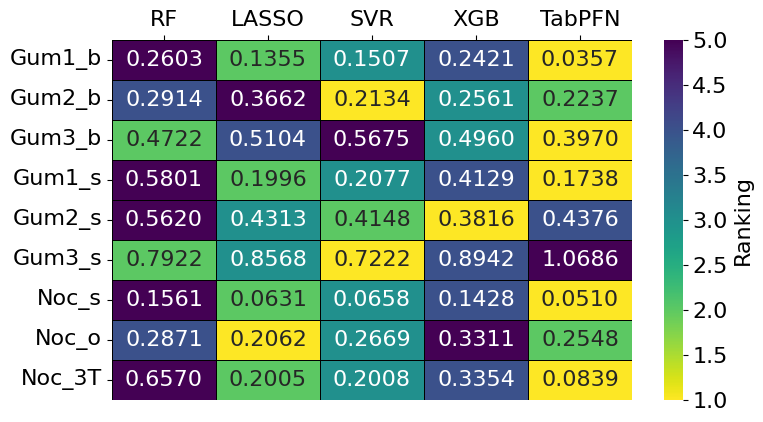

In [12]:
# --- Visualización con Seaborn Heatmap ---

plt.figure(figsize=(8, 4.5)) # Regression
#plt.figure(figsize=(10, 4.5)) # ft regression
#plt.figure(figsize=(10, 8)) # Classification
#plt.figure(figsize=(10, 7)) # ft Classification

# Increase the global font size
plt.rcParams.update({'font.size': 16})

myplot = sns.heatmap(
    data=df_ranked_for_heatmap,
    annot=annot_data,
    cmap="viridis_r",
    cbar=True,
    linewidths=.5,
    fmt='.4f',
    linecolor='black',
    cbar_kws={'label': 'Ranking'},
    **{'annot_kws': {'fontsize': 16}})

myplot.set(xlabel="", ylabel="")
myplot.xaxis.tick_top()

# Configurar etiquetas y título
#plt.title('Rendimiento de Algoritmos por Dataset (Color por Ranking)', fontsize=18)

# Aumentar el tamaño de fuente de los ticks (etiquetas) de los ejes
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16, rotation=0)

plt.tight_layout()

# --- CÓDIGO PARA GUARDAR EN PDF ---
# Guarda la figura actual en un archivo PDF
# Puedes especificar la ruta completa si no quieres que se guarde en el mismo directorio del notebook
plt.savefig(folder_path + 'heatmap_rendimiento_algoritmos.pdf', bbox_inches='tight')

# Muestra la figura en el notebook (opcional si solo quieres guardarla)
plt.show()

In [13]:
# Identificar las columnas donde aplicaremos el ranking (todas excepto 'Dataset')
columns_to_rank = df.columns.drop('Dataset')

# Aplicar el ranking por fila (axis=1)
# Usar .rank() con method='min' para empates y ascending=True para que el menor valor sea 1
# astype('Int64') permite que los NaN (guiones) se mantengan como nulos en los rankings
df_ranked = df[columns_to_rank].rank(axis=1, method='min', ascending=True).astype('Int64')

# Recombinar la columna 'Dataset' con los rankings
df_ranked = pd.concat([df['Dataset'], df_ranked], axis=1)

print("Tabla Original:")
print(df)
print("\n" + "="*50 + "\n")
print("Tabla con Rankings por Fila:")
print(df_ranked)

Tabla Original:
  Dataset      RF   LASSO     SVR     XGB  TabPFN
0  Gum1_b  0.2603  0.1355  0.1507  0.2421  0.0357
1  Gum2_b  0.2914  0.3662  0.2134  0.2561  0.2237
2  Gum3_b  0.4722  0.5104  0.5675  0.4960  0.3970
3  Gum1_s  0.5801  0.1996  0.2077  0.4129  0.1738
4  Gum2_s  0.5620  0.4313  0.4148  0.3816  0.4376
5  Gum3_s  0.7922  0.8568  0.7222  0.8942  1.0686
6   Noc_s  0.1561  0.0631  0.0658  0.1428  0.0510
7   Noc_o  0.2871  0.2062  0.2669  0.3311  0.2548
8  Noc_3T  0.6570  0.2005  0.2008  0.3354  0.0839


Tabla con Rankings por Fila:
  Dataset  RF  LASSO  SVR  XGB  TabPFN
0  Gum1_b   5      2    3    4       1
1  Gum2_b   4      5    1    3       2
2  Gum3_b   2      4    5    3       1
3  Gum1_s   5      2    3    4       1
4  Gum2_s   5      3    2    1       4
5  Gum3_s   2      3    1    4       5
6   Noc_s   5      2    3    4       1
7   Noc_o   4      1    3    5       2
8  Noc_3T   5      2    3    4       1


In [14]:
# Calcular la media de cada columna de rankings
# Excluimos la columna 'Dataset' del cálculo de la media
mean_rankings = df_ranked[columns_to_rank].mean().round(2)

print("Media de los Rankings por Columna:")
print(mean_rankings)

Media de los Rankings por Columna:
RF        4.11
LASSO     2.67
SVR       2.67
XGB       3.56
TabPFN     2.0
dtype: Float64


In [15]:
# Count the occurrences of '1' in each ranking column
# We select the ranking columns and then apply a boolean comparison (== 1)
# and sum the True values (which are treated as 1)
count_of_ones = (df_ranked[columns_to_rank] == 1).sum()

print("Cantidad de '1's en cada Columna (Frecuencia de Primer Lugar):")
print((count_of_ones/len(df_ranked)).round(2)) # Replaced 20 with len(df_ranked)

Cantidad de '1's en cada Columna (Frecuencia de Primer Lugar):
RF         0.0
LASSO     0.11
SVR       0.22
XGB       0.11
TabPFN    0.56
dtype: Float64


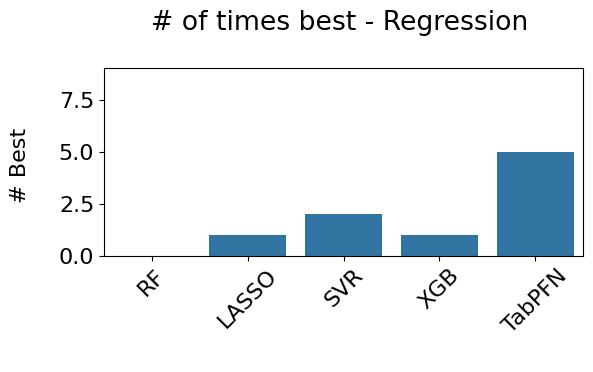

In [16]:
# The data is in the 'count_of_ones' variable, representing the frequency of rank 1
# The values are already divided by 9 in the last output, but let's use the raw count_of_ones
# and calculate the percentage or proportion for the plot.

# We can use the mean_rankings index for the labels as they correspond to the algorithm names
algorithm_names = count_of_ones.index
rank1_counts = count_of_ones.values

# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=algorithm_names, y=rank1_counts)
plt.rcParams.update({'font.size': 16})

plt.title('# of times best - Regression \n')
#plt.title('# of times best - Classification \n')
plt.xlabel(' ')
plt.ylabel('# Best \n')
plt.ylim(0, len(df_ranked)) # Set y-limit to the total number of datasets for context
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout()

plt.savefig(folder_path + 'timesbest.pdf', bbox_inches='tight')


plt.show()

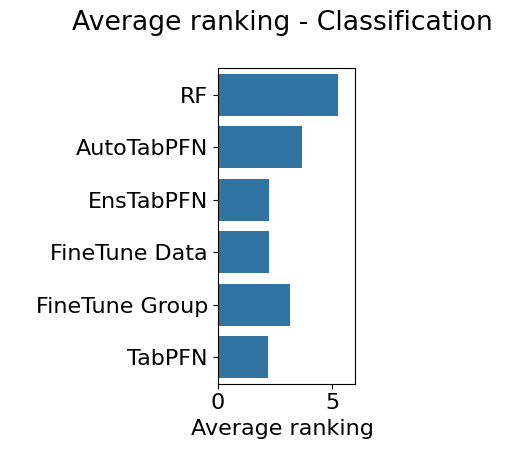

In [ ]:
# The data is in the 'mean_rankings' variable, representing the mean ranking of each method

# We can use the mean_rankings index for the labels as they correspond to the algorithm names
algorithm_names = mean_rankings.index
rank1_counts = mean_rankings.values

# Create a bar plot
plt.figure(figsize=(4, 5))
sns.barplot(y=algorithm_names, x=rank1_counts, orient='h')
plt.rcParams.update({'font.size': 16})

plt.title('Average ranking - Classification \n')
plt.ylabel(' ')
plt.xlabel('Average ranking \n')
plt.xlim(0, len(mean_rankings)) # Set y-limit to the total number of datasets for context
plt.xticks(rotation=0) # Rotate x-axis labels for better readability
plt.tight_layout()

plt.savefig(folder_path + 'average_ranking.pdf', bbox_inches='tight')


plt.show()

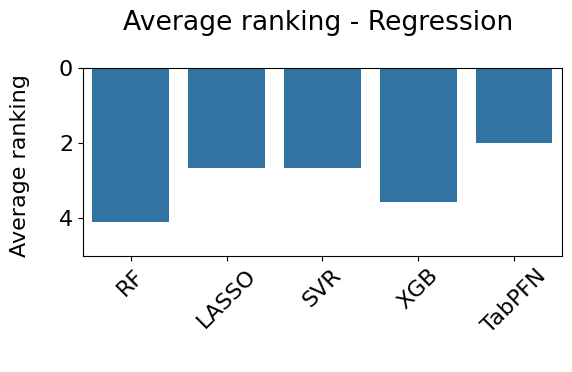

In [17]:
# The data is in the 'mean_rankings' variable, representing the mean ranking of each method

# We can use the mean_rankings index for the labels as they correspond to the algorithm names
algorithm_names = mean_rankings.index
rank1_counts = mean_rankings.values

# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=algorithm_names, y=rank1_counts, orient='v')
plt.rcParams.update({'font.size': 16})
plt.gca().invert_yaxis()
plt.title('Average ranking - Regression \n')
#plt.title('Average ranking - Classification \n')
plt.xlabel(' ')
plt.ylabel('Average ranking \n')
plt.ylim(len(mean_rankings),0) # Set y-limit to the total number of datasets for context
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout()

plt.savefig(folder_path + 'average_ranking.pdf', bbox_inches='tight')


plt.show()



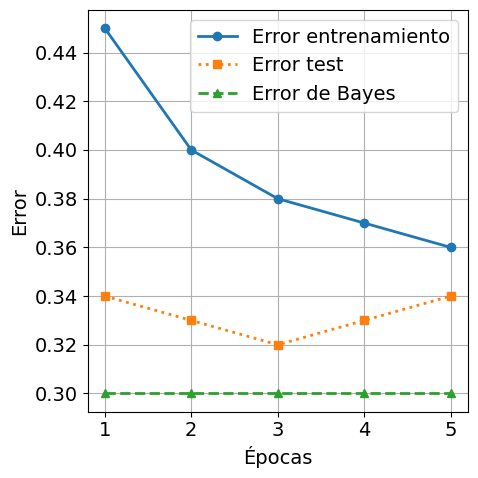

In [ ]:
import matplotlib.pyplot as plt

# Datos ingresados manualmente (ejemplo)
epocas = [1, 2, 3, 4, 5]
#error_entrenamiento = [0.45, 0.35, 0.30, 0.28, 0.27]
#error_test = [0.50, 0.40, 0.38, 0.37, 0.39]
#error_bayes = [0.35, 0.35, 0.35, 0.35, 0.35]

error_entrenamiento = [0.45, 0.40, 0.38, 0.37, 0.36]
error_test = [0.34, 0.33, 0.32, 0.33, 0.34]
error_bayes = [0.30, 0.30, 0.30, 0.30, 0.30]

#error_entrenamiento = [0.44, 0.37, 0.32, 0.30, 0.27]
#error_test = [0.50, 0.40, 0.35, 0.36, 0.37]
#error_bayes = [0.42, 0.42, 0.42, 0.42, 0.42]

# Crear la figura
plt.figure(figsize=(5, 5))
plt.rcParams.update({'font.size': 14})

plt.plot(epocas, error_entrenamiento, marker='o', label='Error entrenamiento', linewidth=2)
plt.plot(epocas, error_test, marker='s', label='Error test', linestyle=':', linewidth=2)
plt.plot(epocas, error_bayes, marker='^', label='Error de Bayes', linestyle='--', linewidth=2)

# Etiquetas y formato
plt.xlabel('Épocas')
plt.ylabel('Error')
plt.xticks(epocas)  # Mostrar solo ticks enteros definidos en `epocas`
plt.grid(True)
plt.legend()
plt.tight_layout()

# Mostrar la gráfica
plt.show()